In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme()
sns.set_context('talk')

In [2]:
childcare = pd.read_csv("data/abortion-childcare.csv")
childcare = childcare.drop(columns =["Unnamed: 0"])
paid_leave = pd.read_csv("data/abortion-paid-leave.csv")
paid_leave = paid_leave.drop(columns=['Unnamed: 0'])
abortion = childcare.merge(paid_leave, how='inner', left_on='State', right_on='State')
abortion = abortion.drop(columns=['Abortion Overview_y'])
abortion = abortion.rename(columns={'Abortion Overview_x':'Abortion Overview'})
abortion["Infant Care %"] = 0
for i in range(len(abortion["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"])):
    perc = abortion["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"][i]
    num = perc[0:len(perc)-1]
    abortion["Infant Care %"][i] = float(num)

<ipython-input-2-cf52a16b5729>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion["Infant Care %"][i] = float(num)


In [3]:
abortion.head()

,State,Abortion Overview,Child Care Total Score,"Cost of Infant Care as Percent of Women's Median Annual Earningsa,b",Paid Leave Legislation Total Score,Infant Care %
0,Alabama,significantly restricted,1.42,16.8%,0.0,16
1,Alaska,neither,1.37,23.9%,0.0,23
2,Arizona,significantly restricted,0.97,25.5%,0.0,25
3,Arkansas,significantly restricted,1.54,19.8%,0.0,19
4,California,protected,0.95,27.7%,2.0,27


(array([0, 1, 2]),
 [Text(0, 0, 'significantly restricted'),
  Text(1, 0, 'neither'),
  Text(2, 0, 'protected')])

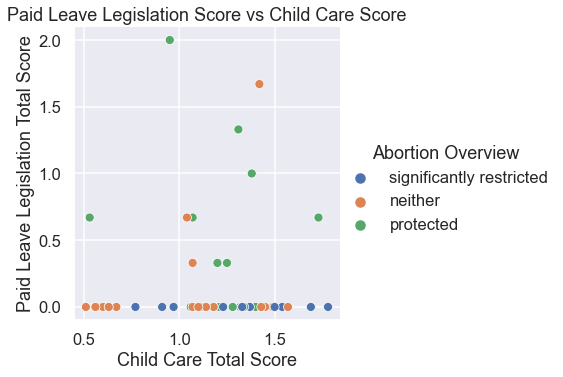

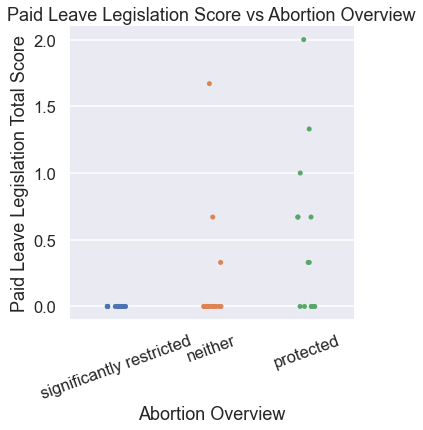

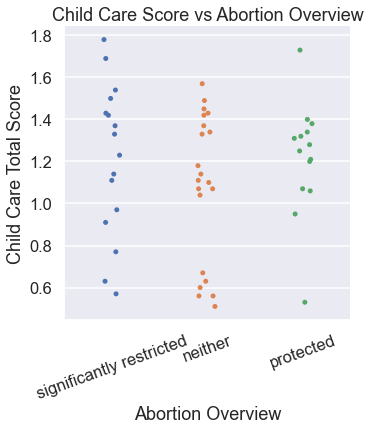

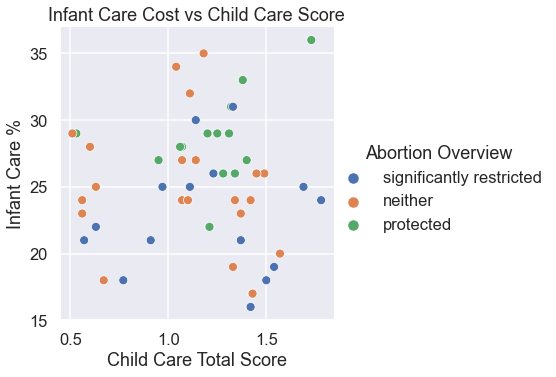

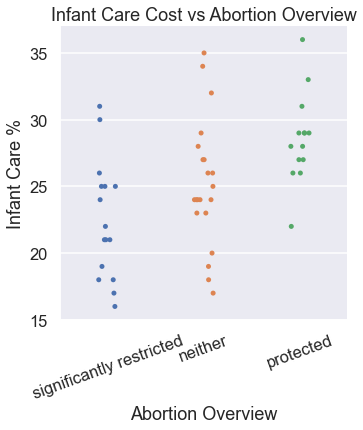

In [4]:
paidleave_vs_childcare = sns.relplot(data=abortion, x = "Child Care Total Score", y = "Paid Leave Legislation Total Score", hue = "Abortion Overview").set(title = "Paid Leave Legislation Score vs Child Care Score")
paidleave_vs_abortion = sns.catplot(data=abortion, x = "Abortion Overview", y = "Paid Leave Legislation Total Score").set(title = "Paid Leave Legislation Score vs Abortion Overview")
plt.xticks(rotation=20)


childcare_vs_abortion = sns.catplot(data=abortion, x = "Abortion Overview", y = "Child Care Total Score").set(title = "Child Care Score vs Abortion Overview")
plt.xticks(rotation = 20)


careperc_vs_childcare = sns.relplot(data=abortion, x = "Child Care Total Score", y = "Infant Care %", hue = "Abortion Overview").set(title = "Infant Care Cost vs Child Care Score")
careperc_vs_abortion = sns.catplot(data=abortion, x = "Abortion Overview", y = "Infant Care %").set(title = "Infant Care Cost vs Abortion Overview")
plt.xticks(rotation = 20)




In [5]:
# Insurance Stuff

In [6]:
def fix_data_types(df):
    df = df.infer_objects()
    df = df.astype({"statefips": str, "countyfips": str})
    df["countyfips"] = df["countyfips"].apply(lambda x: x.zfill(3))
    df["GEOID20"] = df["statefips"] + df["countyfips"]
    return df

In [7]:
sahie_2018 = pd.read_csv("data/sahie_2018.csv", header=68, dtype=str)
sahie_2018 = fix_data_types(sahie_2018)
sahie_2018 = sahie_2018.drop(columns=["statefips", "version", "year", "countyfips", "county_name", "Unnamed: 25", "GEOID20"])
sahie_2018 = sahie_2018[sahie_2018['racecat'] != '0']
sahie_2018 = sahie_2018[sahie_2018['sexcat'] != '0']
sahie_2018 = sahie_2018[sahie_2018['iprcat'] != '0']
sahie_2018['NUI'] = sahie_2018['NUI'].astype(int)
sahie_2018['NIPR'] = sahie_2018['NIPR'].astype(int)
sahie_2018['NIC'] = sahie_2018['NIC'].astype(int)
sahie_2018 = sahie_2018.reset_index()
sahie_2018['state'] = 0

for i in range(len(sahie_2018['state_name'])):
    state = sahie_2018['state_name'][i]
    stripped = state.strip()
    sahie_2018['state'][i] = stripped

sahie_2018 = sahie_2018.drop(columns=["state_name"])
sahie_2018.head()

<ipython-input-7-2ff2970327df>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sahie_2018['state'][i] = stripped
/Users/parkerfaircloth-henise/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,index,geocat,agecat,racecat,sexcat,iprcat,NIPR,nipr_moe,NUI,nui_moe,...,nic_moe,PCTUI,pctui_moe,PCTIC,pctic_moe,PCTELIG,pctelig_moe,PCTLIIC,pctliic_moe,state
0,25,40,0,1,1,1,326951,6982,73594,4581,...,6710,22.5,1.3,77.5,1.3,5.9,0.4,20.2,0.5,Alabama
1,26,40,0,1,1,2,432794,7411,89238,4989,...,7262,20.6,1.1,79.4,1.1,7.1,0.4,27.4,0.6,Alabama
2,27,40,0,1,1,3,200722,6082,49079,3723,...,5647,24.5,1.7,75.5,1.7,3.9,0.3,12.1,0.5,Alabama
3,28,40,0,1,1,4,737747,8441,118361,5860,...,8905,16.0,0.8,84.0,0.8,9.4,0.5,49.5,0.7,Alabama
4,29,40,0,1,1,5,537025,8078,69282,4008,...,8018,12.9,0.7,87.1,0.7,5.5,0.3,37.3,0.6,Alabama


In [8]:
state_data = sahie_2018.merge(abortion, how='outer', left_on='state', right_on='State')
NUI_means = state_data.groupby("state").mean()['NUI']
state_data["NIPR:NUI"] = state_data["NIPR"]/state_data["NUI"]
state_data['racecat'] = state_data['racecat'].astype(float)
state_data['iprcat'] = state_data['iprcat'].astype(float)
state_data = state_data.drop(columns=['state'])

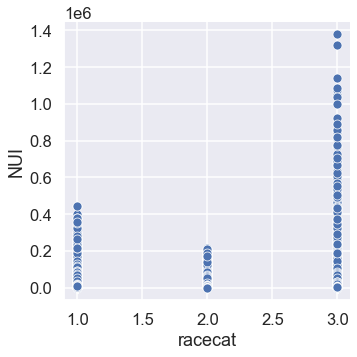

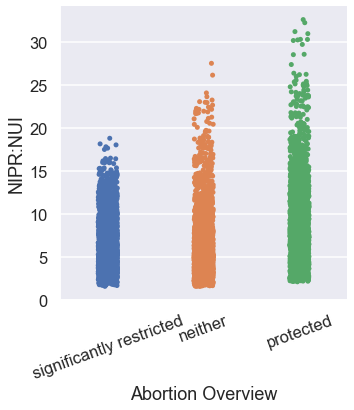

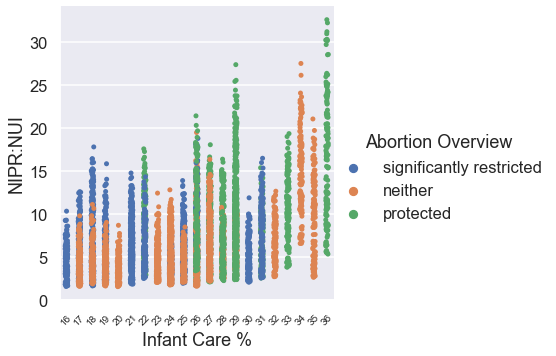

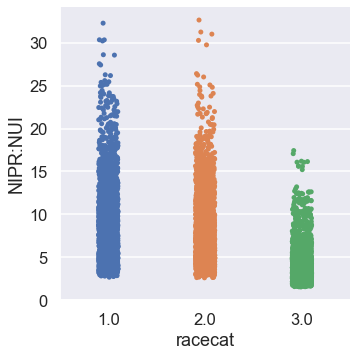

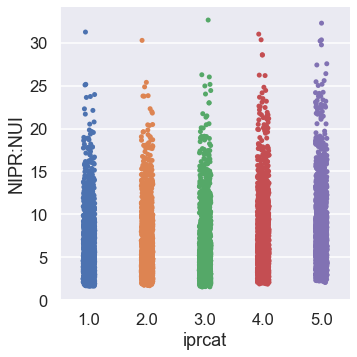

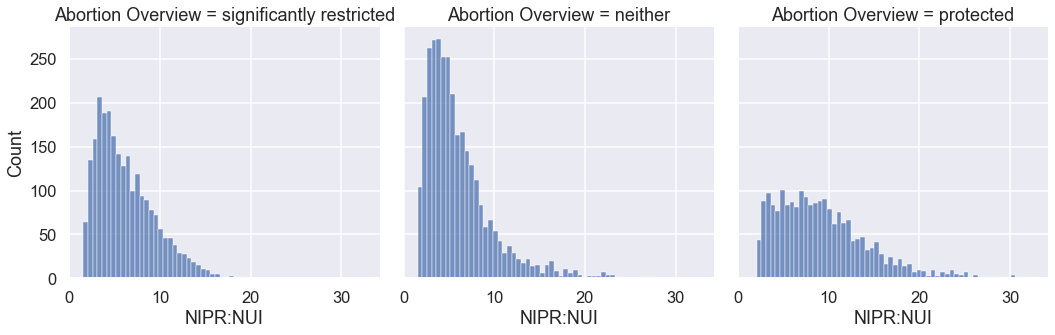

In [9]:
NUI_vs_racecat = sns.relplot(data=state_data, x = "racecat", y="NUI")
ratio_vs_abortion = sns.catplot(data=state_data, x="Abortion Overview", y = "NIPR:NUI")
plt.xticks(rotation=20)
ratio_vs_careperc = sns.catplot(data=state_data, x="Infant Care %", y = "NIPR:NUI", hue = "Abortion Overview")
plt.xticks(rotation=45, fontsize = 10)
ratio_vs_race = sns.catplot(data=state_data, x="racecat", y = "NIPR:NUI")
ratio_vs_income = sns.catplot(data=state_data, x="iprcat", y = "NIPR:NUI")
abortion_vs_ratio = sns.displot(data=state_data, x='NIPR:NUI', col='Abortion Overview')

(array([0, 1, 2]),
 [Text(0, 0, 'significantly restricted'),
  Text(1, 0, 'neither'),
  Text(2, 0, 'protected')])

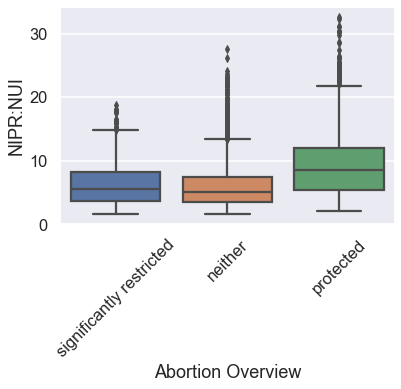

In [10]:
ratio_vs_abortion = sns.boxplot(x=state_data['Abortion Overview'], y=state_data['NIPR:NUI'])
plt.xticks(rotation = 45)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Classification Accuracy: 0.4664799253034547


/Users/parkerfaircloth-henise/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


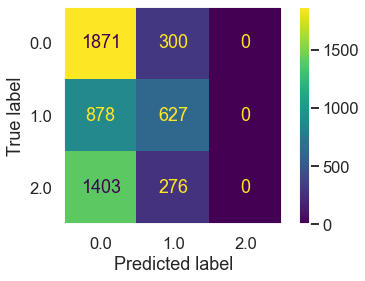

In [12]:
Y = OrdinalEncoder().fit_transform(state_data[["Abortion Overview"]].values)
X = state_data[['NIPR:NUI',"iprcat","racecat", "Child Care Total Score", "Paid Leave Legislation Total Score","Infant Care %",'NUI',"NIPR","NIC"]].values
#we split the dataset into a test and training set
train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.7, random_state=0)
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
clf.fit(train_x, train_y)
clf.score(test_x, test_y)
metrics.plot_confusion_matrix(clf, test_x, test_y)
plt.grid(False)
print("Classification Accuracy:", clf.score(test_x, test_y))